In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
normal = data[data.Class == 0]
scam = data[data.Class == 1]

In [6]:
scam.Class.value_counts()

Class
1    492
Name: count, dtype: int64

In [9]:
raw_data = pd.read_csv('creditcard.csv')
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


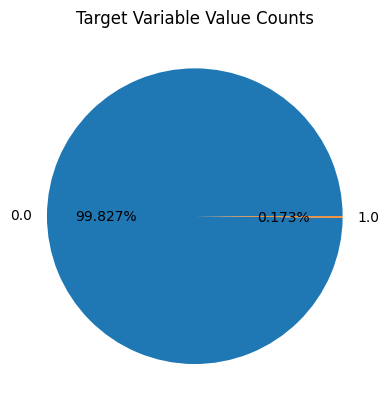

In [11]:
labels = big_raw_data.Class.unique()
sizes = big_raw_data.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

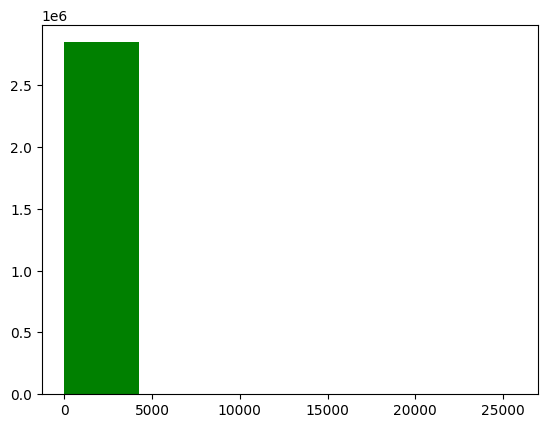

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [12]:
plt.hist(big_raw_data.Amount.values,6,histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

In [15]:
new_data = normal.sample(n=492)
scam

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [16]:
new_data = pd.concat([new_data,scam],axis=0)

In [17]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
54516,46487.0,1.386684,-0.603005,-0.059154,-0.696756,-0.737822,-0.607249,-0.447744,-0.065036,-0.823453,...,0.172991,0.443567,-0.211546,0.037030,0.760623,-0.059784,-0.022786,-0.010341,20.00,0
88972,62368.0,1.232193,-0.229653,-0.332639,0.085176,1.573836,3.959564,-1.130371,1.067693,0.628682,...,-0.063580,-0.169507,-0.034198,0.997747,0.552384,-0.384011,0.072874,0.031000,1.18,0
134147,80666.0,1.200634,0.313994,0.413508,0.624293,-0.409269,-0.864257,-0.010812,-0.071304,-0.245731,...,-0.222668,-0.677062,0.142360,0.496244,0.160208,0.064331,-0.026271,0.022634,0.99,0
45728,42472.0,1.159605,0.403626,0.523389,2.493116,0.348971,0.832643,-0.052335,0.103184,-0.344919,...,-0.087523,0.028621,-0.176313,-0.716244,0.706560,0.154336,0.031386,0.012514,11.71,0
282785,171148.0,0.211314,2.148825,-0.847160,4.922153,0.585284,-0.062656,0.141394,0.653887,-2.004934,...,-0.325739,-0.950508,0.240961,-0.329588,-0.814722,0.037558,0.173355,0.007751,0.90,0


In [18]:
new_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88370.370935,-2.353300,1.764800,-3.503783,2.299565,-1.542281,-0.672264,-2.779482,0.286286,-1.284820,...,0.349339,0.030297,-0.023394,-0.019498,0.015956,0.013910,0.071897,0.038324,108.140376,0.500000
std,47861.774716,5.499955,3.705725,6.217656,3.186292,4.216243,1.789311,5.851199,4.883889,2.328922,...,2.784954,1.184735,1.154342,0.566680,0.676378,0.490077,1.051216,0.437911,237.673588,0.500254
min,25.000000,-30.552380,-10.798133,-31.103685,-3.959271,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.659700,-4.781606,-1.317630,-9.390980,-3.147359,0.000000,0.000000
25%,47161.250000,-2.784711,-0.146463,-5.074851,-0.049583,-1.803310,-1.569670,-3.103817,-0.195065,-2.310176,...,-0.164227,-0.521726,-0.245261,-0.361337,-0.330516,-0.309693,-0.067561,-0.055697,1.180000,0.000000
50%,81257.000000,-0.771596,0.939311,-1.386390,1.364654,-0.445154,-0.644311,-0.603583,0.180659,-0.771967,...,0.174014,0.054537,-0.038623,0.030709,0.049648,-0.048522,0.045250,0.034765,18.985000,0.500000
75%,133960.500000,1.020247,2.735735,0.376756,4.289110,0.485758,0.081848,0.234593,0.910678,0.219904,...,0.649102,0.610616,0.183532,0.393393,0.390082,0.333157,0.456781,0.224328,99.990000,1.000000
max,172782.000000,2.198357,22.057729,3.511280,12.114672,11.095089,6.474115,5.802537,20.007208,5.581568,...,27.202839,8.361985,5.466230,3.090495,2.208209,2.745261,3.052358,1.779364,2323.340000,1.000000


In [19]:
new_data.groupby("Class").mean()
X = new_data.drop("Class",axis=1)
Y = new_data["Class"]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [22]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
pred = model.predict(x_test)

In [24]:
acc = accuracy_score(pred,y_test)

In [25]:
print(acc)

0.9238578680203046


In [26]:
pred = model.predict(x_test)
acc = accuracy_score(pred,y_test)
new_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.249809,-0.207088,0.157823,-0.204658,0.302226,0.137591,0.225605,-0.147921,0.179583,...,-0.065459,0.124047,0.066548,0.022728,-0.222776,-0.045281,-0.136362,0.011685,-0.005473,-0.159364
V1,0.249809,1.000000,-0.799035,0.879284,-0.616076,0.863488,0.322857,0.888230,-0.078977,0.666177,...,0.015014,-0.032543,-0.045878,-0.050933,-0.072434,0.065501,0.185575,0.184126,-0.026214,-0.439982
V2,-0.207088,-0.799035,1.000000,-0.865178,0.689646,-0.795492,-0.270251,-0.850709,-0.021516,-0.704307,...,0.042408,-0.008753,0.156599,-0.026875,0.105212,0.006498,-0.143758,0.011502,-0.255770,0.501905
V3,0.157823,0.879284,-0.865178,1.000000,-0.770155,0.852728,0.457025,0.889583,-0.168214,0.769008,...,0.027606,-0.051728,-0.035674,0.049242,-0.086169,-0.030422,0.086190,0.123233,0.006266,-0.567946
V4,-0.204658,-0.616076,0.689646,-0.770155,1.000000,-0.582559,-0.439374,-0.709760,0.104544,-0.780218,...,-0.017635,0.103255,0.017020,-0.112636,-0.032005,0.168170,-0.005281,-0.071637,-0.013309,0.704143
V5,0.302226,0.863488,-0.795492,0.852728,-0.582559,1.000000,0.309479,0.842964,-0.201925,0.662721,...,0.041498,-0.082558,-0.081996,-0.096967,-0.085472,0.048724,0.168942,0.164577,-0.106035,-0.381800
V6,0.137591,0.322857,-0.270251,0.457025,-0.439374,0.309479,1.000000,0.279259,-0.552705,0.376257,...,0.008261,-0.001299,0.302176,0.036454,-0.135739,-0.087639,-0.173201,-0.044145,0.121825,-0.405654
V7,0.225605,0.888230,-0.850709,0.889583,-0.709760,0.842964,0.279259,1.000000,0.089080,0.765019,...,0.040713,-0.108587,-0.096440,-0.008757,0.041501,0.013348,0.206856,0.147722,0.124857,-0.476939
V8,-0.147921,-0.078977,-0.021516,-0.168214,0.104544,-0.201925,-0.552705,0.089080,1.000000,-0.076953,...,-0.103547,0.020738,-0.427212,0.074101,0.232787,0.051075,0.289736,-0.017696,0.017699,0.058252
V9,0.179583,0.666177,-0.704307,0.769008,-0.780218,0.662721,0.376257,0.765019,-0.076953,1.000000,...,0.156529,-0.217479,-0.060674,0.046637,-0.026963,-0.149909,0.088039,0.129809,0.028652,-0.556894


In [27]:
def pred(data):
    data = np.asarray(data).reshape(1,-1)
    predd = model.predict(data)
    if predd == 0:
        print("it's a normal card")
    else:
        print("it's a scam card")

In [30]:
pred([4,1.22965763450793,0.141003507049326,0.0453707735899449,1.20261273673594,0.191880988597645,0.272708122899098,-0.00515900288250983,0.0812129398830894,0.464959994783886,-0.0992543211289237,-1.41690724314928,-0.153825826253651,-0.75106271556262,0.16737196252175,0.0501435942254188,-0.443586797916727,0.00282051247234708,-0.61198733994012,-0.0455750446637976,-0.21963255278686,-0.167716265815783,-0.270709726172363,-0.154103786809305,-0.780055415004671,0.75013693580659,-0.257236845917139,0.0345074297438413,0.00516776890624916,4.99])

it's a normal card


In [31]:
pred([4462,-2.30334956758553,1.759247460267,-0.359744743330052,2.33024305053917,-0.821628328375422,-0.0757875706194599,0.562319782266954,-0.399146578487216,-0.238253367661746,-1.52541162656194,2.03291215755072,-6.56012429505962,0.0229373234890961,-1.47010153611197,-0.698826068579047,-2.28219382856251,-4.78183085597533,-2.61566494476124,-1.33444106667307,-0.430021867171611,-0.294166317554753,-0.932391057274991,0.172726295799422,-0.0873295379700724,-0.156114264651172,-0.542627889040196,0.0395659889264757,-0.153028796529788,239.93])

it's a scam card
